# Foreign Trade - Overall development in foreign trade since 1950

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Overall development in foreign trade in million Euro.xlsx')
df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4 275,5 815,NaN,NaN
1,1951,7 453,7 529,74.3,29.5
2,1952,8 645,8 284,16.0,10.0
3,1953,9 472,8 186,9.6,1.2
4,1954,11 266,9 887,18.9,20.8
...,...,...,...,...,...
66,2016,1 203 833,954 917,0.9,0.6
67,2017,1 278 958,1 031 013,6.2,8.0
68,2018,1 317 440,1 088 720,3.0,5.6
69,2019,1 328 152,1 104 141,0.8,1.4


In [5]:
df.shape     

(71, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     object 
 2   Imports      71 non-null     object 
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


# Data Cleaning

In [7]:
df.replace(' ', '', regex=True, inplace=True)                                   # strip dataframe of all white spaces
df.head()

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4275,5815,NaN,NaN
1,1951,7453,7529,74.3,29.5
2,1952,8645,8284,16.0,10.0
3,1953,9472,8186,9.6,1.2
4,1954,11266,9887,18.9,20.8


In [8]:
df[['Exports', 'Imports']] = df[['Exports', 'Imports']].astype('int')           # change data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     int32  
 2   Imports      71 non-null     int32  
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 2.3 KB


In [9]:
df['Exp_Imp_Chg'] = np.subtract(df['Exports'], df['Imports'])                   
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540
1,1951,7453,7529,74.3,29.5,-76
2,1952,8645,8284,16.0,10.0,361
3,1953,9472,8186,9.6,1.2,1286
4,1954,11266,9887,18.9,20.8,1379
...,...,...,...,...,...,...
66,2016,1203833,954917,0.9,0.6,248916
67,2017,1278958,1031013,6.2,8.0,247945
68,2018,1317440,1088720,3.0,5.6,228720
69,2019,1328152,1104141,0.8,1.4,224011


In [10]:
df[['Exports', 'Imports', 'Exports_Pct', 'Imports_Pct',	'Exp_Imp_Chg']].describe()

,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
count,7.100000e+01,7.100000e+01,70.000000,70.000000,71.000000
mean,4.030955e+05,3.364823e+05,10.077143,9.781429,66613.169014
std,4.161218e+05,3.398854e+05,9.771923,7.080803,78399.931232
min,4.275000e+03,5.815000e+03,0.200000,0.300000,-1540.000000
25%,4.770250e+04,3.933100e+04,4.175000,3.825000,6272.000000
50%,2.691250e+05,2.115440e+05,8.850000,8.050000,26218.000000
75%,6.578875e+05,5.405425e+05,12.900000,14.050000,131354.500000
max,1.328152e+06,1.104141e+06,74.300000,29.500000,248916.000000


# Missing Values Exploration

In [11]:
df.isna().sum()

Year           0
Exports        0
Imports        0
Exports_Pct    1
Imports_Pct    1
Exp_Imp_Chg    0
dtype: int64

In [12]:
df[df['Exports_Pct'].isna()]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [13]:
df[df['Imports_Pct'].isna()]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [14]:
df[['Exports', 'Imports']] = df[['Exports', 'Imports']] * 1e3               # convert exports and imports into millions
df.head()

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275000.0,5815000.0,NaN,NaN,-1540
1,1951,7453000.0,7529000.0,74.3,29.5,-76
2,1952,8645000.0,8284000.0,16.0,10.0,361
3,1953,9472000.0,8186000.0,9.6,1.2,1286
4,1954,11266000.0,9887000.0,18.9,20.8,1379


# Data Aggregation

In [15]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def billion(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)

In [16]:
df_agg_exp = df['Exports'].agg([np.mean, np.sum])
df_agg_exp

mean    4.030955e+08
sum     2.861978e+10
Name: Exports, dtype: float64

In [17]:
def plot_bar(x, y, data=None, hue=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None, leg_title=None, loc=None, leg_labels=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(data=data, x=x, y=y, hue=hue, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # plot legend
    plt.legend(title=leg_title, loc=loc, labels=leg_labels)

    return plot_bar

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function __main__.plot_bar(x, y, data=None, hue=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None, leg_title=None, loc=None, leg_labels=None)>

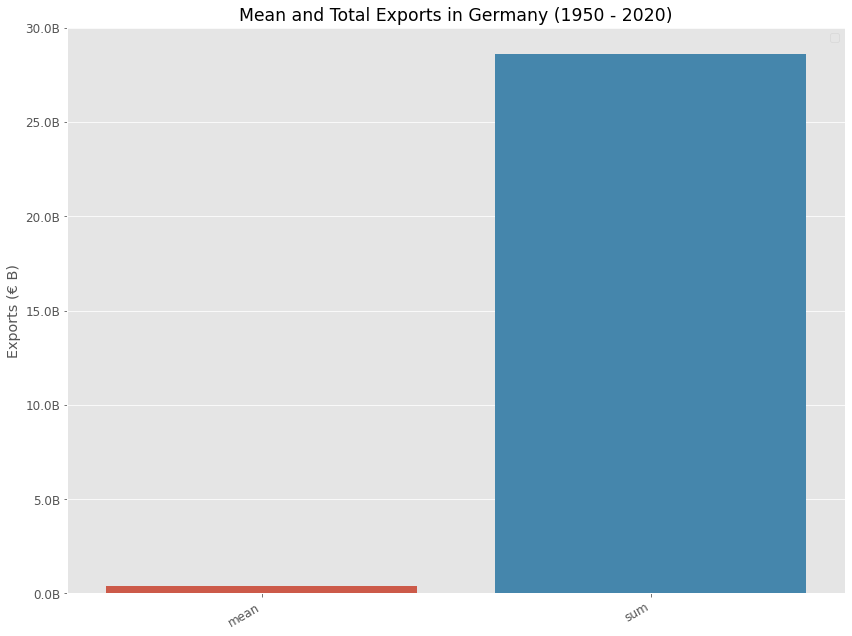

In [18]:
plot_bar(
    x=df_agg_exp.keys(), y=df_agg_exp.values,
    ylabel='Exports (€ B)', title='Mean and Total Exports in Germany (1950 - 2020)',
    ci=None, formatter=format_bill, 
)

In [19]:
df_agg_imp = df['Imports'].agg([np.mean, np.sum])
df_agg_imp

mean    3.364823e+08
sum     2.389024e+10
Name: Imports, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function __main__.plot_bar(x, y, data=None, hue=None, ci=None, xlabel=None, ylabel=None, title=None, formatter=None, leg_title=None, loc=None, leg_labels=None)>

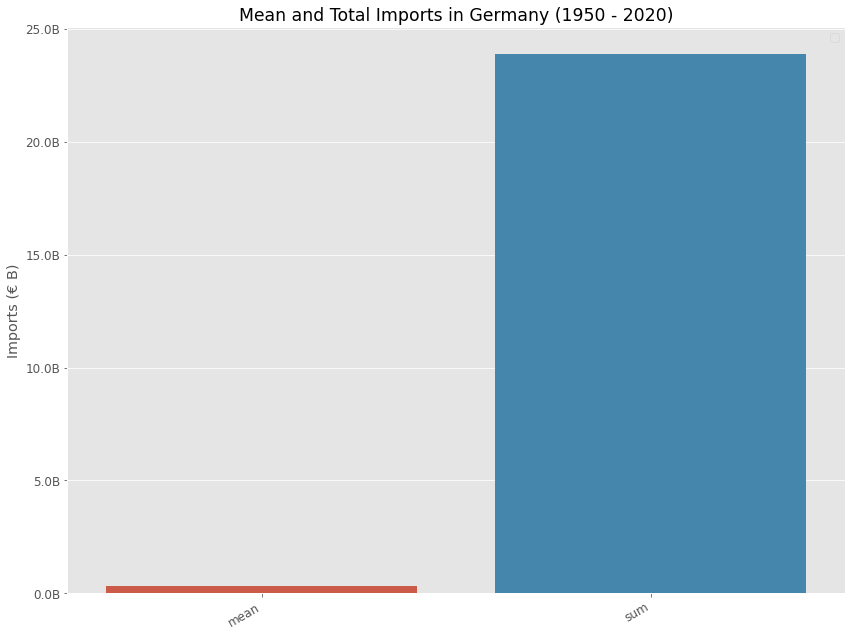

In [20]:
plot_bar(
    x=df_agg_imp.keys(), y=df_agg_imp.values,
    ylabel='Imports (€ B)', title='Mean and Total Imports in Germany (1950 - 2020)',
    ci=None, formatter=format_bill, 
)

# Data Visualization

In [21]:
def plot_line(x, y, data=None ,xlabel=None, ylabel=None, hue=None, ci=None, title=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(x=x, y=y, data=data, hue=hue, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line

Overall development in foreign trade 1950 - 2020 in Germany

<function __main__.plot_line(x, y, data=None, xlabel=None, ylabel=None, hue=None, ci=None, title=None, formatter=None)>

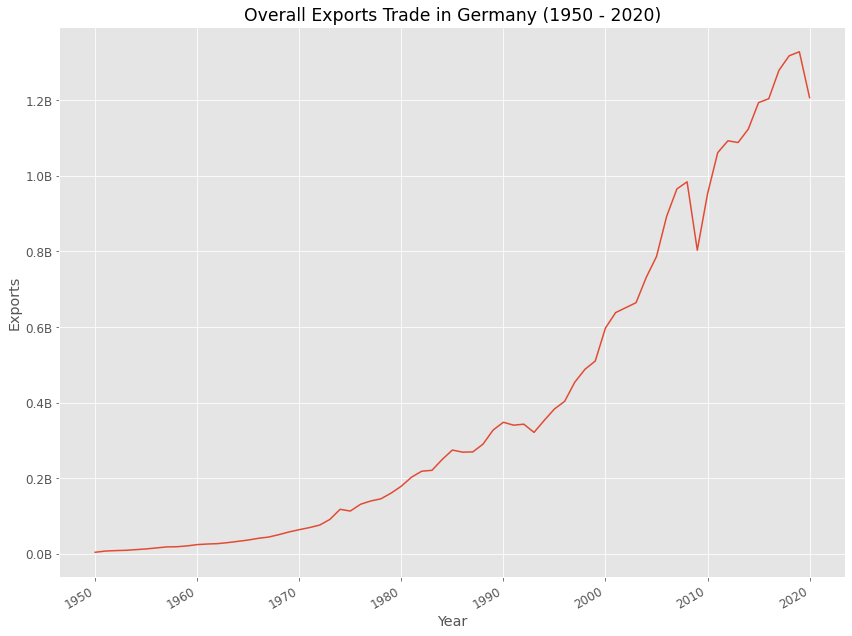

In [22]:
plot_line(
    data=df,
    x='Year', y='Exports',
    xlabel='Year', ylabel='Exports', title='Overall Exports Trade in Germany (1950 - 2020)',
    formatter=format_bill
)

Overall Imports Trade in Germany (1950 - 2020)

<function __main__.plot_line(x, y, data=None, xlabel=None, ylabel=None, hue=None, ci=None, title=None, formatter=None)>

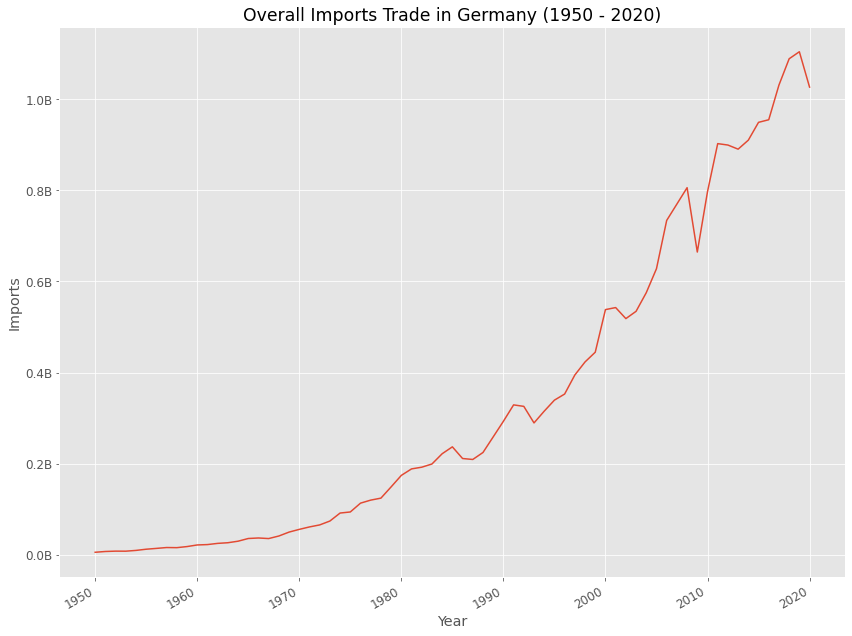

In [23]:
plot_line(
    data=df,
    x='Year', y='Imports',
    xlabel='Year', ylabel='Imports', title='Overall Imports Trade in Germany (1950 - 2020)',
    formatter=format_bill
)

Export or Import Surplus

<function __main__.plot_line(x, y, data=None, xlabel=None, ylabel=None, hue=None, ci=None, title=None, formatter=None)>

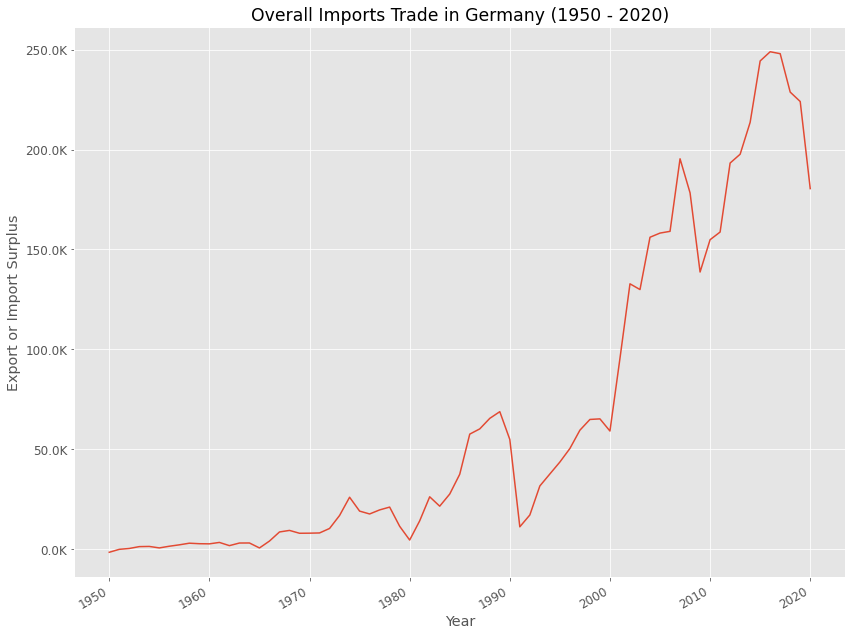

In [24]:
plot_line(
    data=df,
    x='Year', y='Exp_Imp_Chg',
    xlabel='Year', ylabel='Export or Import Surplus', title='Overall Imports Trade in Germany (1950 - 2020)',
    formatter=format_tsd
)

Exports and Imports

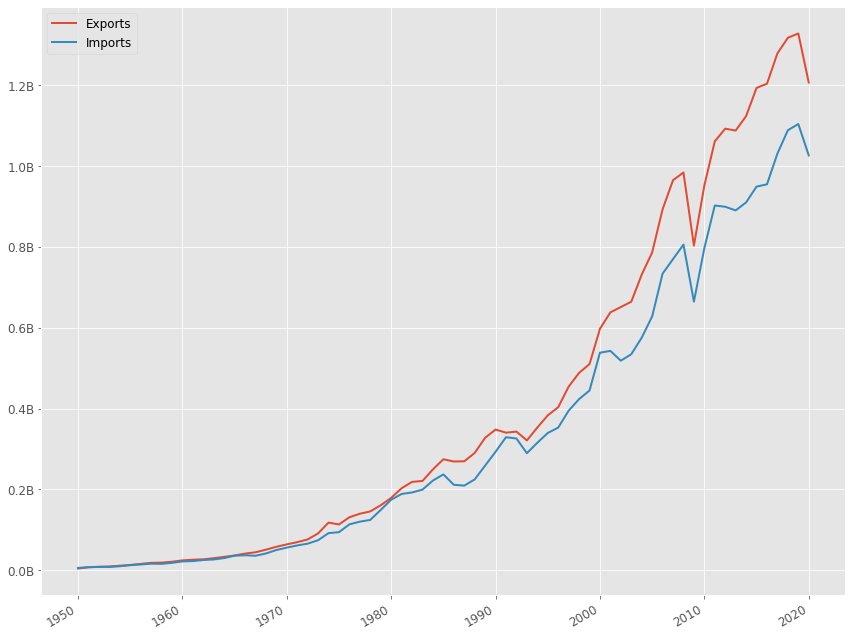

In [25]:
# initialize the matplotlib figure
fig, ax = plt.subplots()
fig.autofmt_xdate()

# percentage exports, imports and change in exports and imports
ax.plot(df['Year'], df['Exports'], label='Exports', linewidth=2)
ax.plot(df['Year'], df['Imports'], label='Imports', linewidth=2)

# set y-axis limit
ax.yaxis.set_major_formatter(format_bill)

# label plots
ax.legend(loc='upper left')

Exports and Imports in Percent

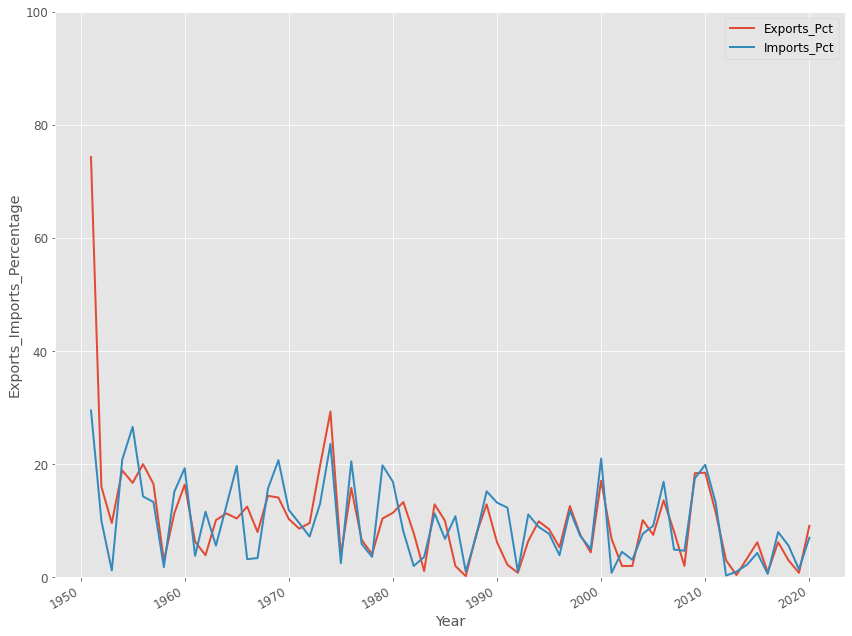

In [26]:
# initialize the matplotlib figure
fig, ax = plt.subplots()
fig.autofmt_xdate()

# percentage change in exports and imports
ax.plot(df['Year'], df['Exports_Pct'], label='Exports_Pct', linewidth=2)
ax.plot(df['Year'], df['Imports_Pct'], label='Imports_Pct', linewidth=2)

# set plot labels
ax.set(xlabel='Year', ylabel='Exports_Imports_Percentage')

# set y-axis limit
ax.set_ylim(0, 100)

# legend label
ax.legend(loc='upper right')